In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/marketing_campaign.csv',sep='\t')  # Load all sheets to understand the structure if multiple

# Display sheet names to understand file structure
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df = data

In [5]:
# Data Cleaning Step

# 1. Checking for missing values
missing_values = df.isnull().sum()

# 2. Duplicates
duplicates = df.duplicated().sum()

# 3. Data type adjustments for `Dt_Customer` column (Customer since date)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')  # Convert to datetime format

# 4. Fill or drop missing values for further steps
# For simplicity, we'll drop rows with missing data for this demo, but real analysis may consider imputation
df = df.dropna()

# Summary of cleaning
{
    "missing_values": missing_values,
    "duplicates": duplicates,
    "data_types": df.dtypes
}


{'missing_values': ID                      0
 Year_Birth              0
 Education               0
 Marital_Status          0
 Income                 24
 Kidhome                 0
 Teenhome                0
 Dt_Customer             0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Z_CostContact           0
 Z_Revenue               0
 Response                0
 dtype: int64,
 'duplicates': 0,
 'data_types': ID                              int64
 Year_Birth                      int64
 Education                      object
 Marital_Status                 obj

## Exploratory Data Analysis

In [6]:
df['Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)
#df[['ID', 'Recency', 'Frequency', 'Monetary']]

### univariate analysis

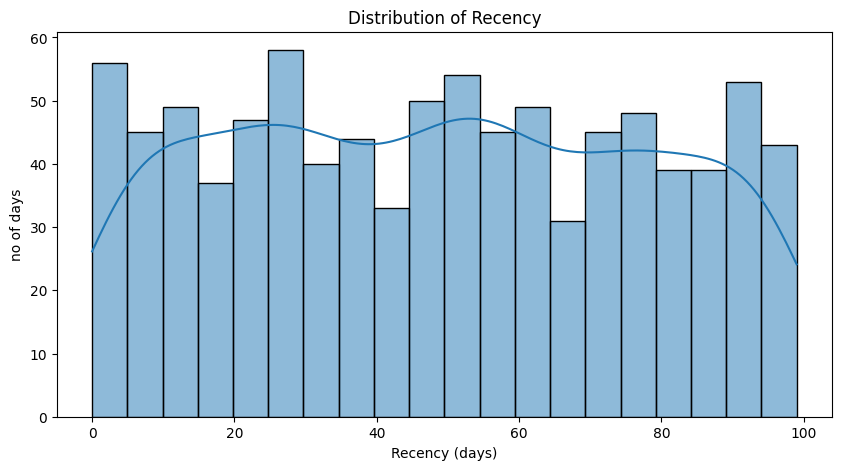

In [7]:
# Recency
plt.figure(figsize=(10, 5))
sns.histplot(df['Recency'], kde=True, bins=20)
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('no of days')
plt.show()

- Recency appears to be pretty uniform across the range of values, with most customers having a recency between 0 and 100 days
- Steady level of engagement among the customers as we do not appear to have any skewed distribution
- Customer base likely to have equal distribution of mix of recently active and somewhat inactive customers

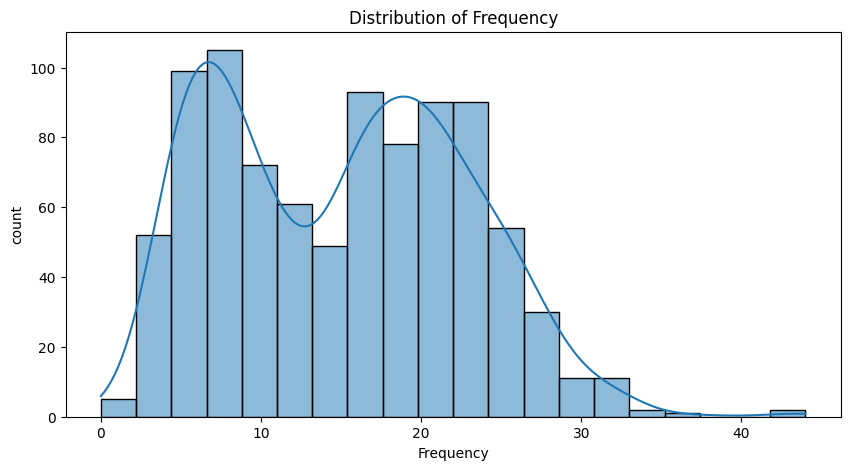

In [8]:
# Frequency
plt.figure(figsize=(10, 5))
sns.histplot(df['Frequency'], kde=True, bins=20)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('count')
plt.show()

 - Distribution is righ-skewed indicating most of the customers are making fewwer than 10 purchases
 - Very few set of custoemrs seem to be frequent buyers
 - Smaller customer segment would make multiple purchases, while most of them have lower engagement

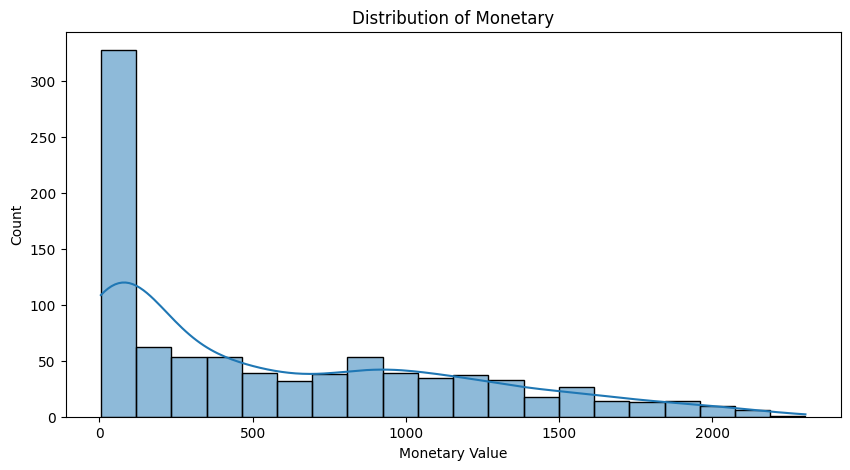

In [9]:
# Monetory
plt.figure(figsize=(10, 5))
sns.histplot(df['Monetary'], kde=True, bins=20)
plt.title('Distribution of Monetary')
plt.xlabel('Monetary Value')
plt.ylabel('Count')
plt.show()

- This distribution heavily right skewed indicating that most of the customers are spending low amounts, while a very few have high spending levels
- Customer segment - low-value customers with small segment of high-value customers
- Small portion og customers contribute to significant portion of revenue.

### bivariate analysis

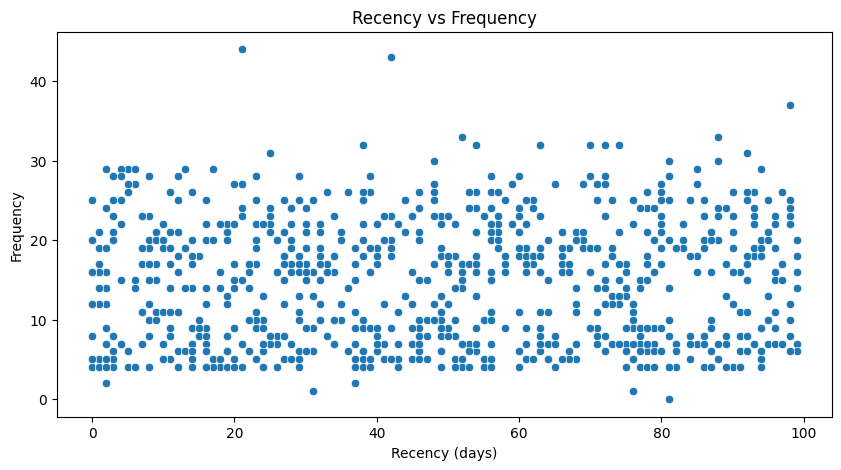

In [10]:
# recency vs freq
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Recency', y='Frequency', data=df)
plt.title('Recency vs Frequency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

 - Even spread of values indicating no strong correlation between recency and frequency
 - Recent and not so recent - both have varying purchase frequencies
 - There isn’t a clear trend indicating that recent buyers (lower recency) necessarily make more purchases than older customers.

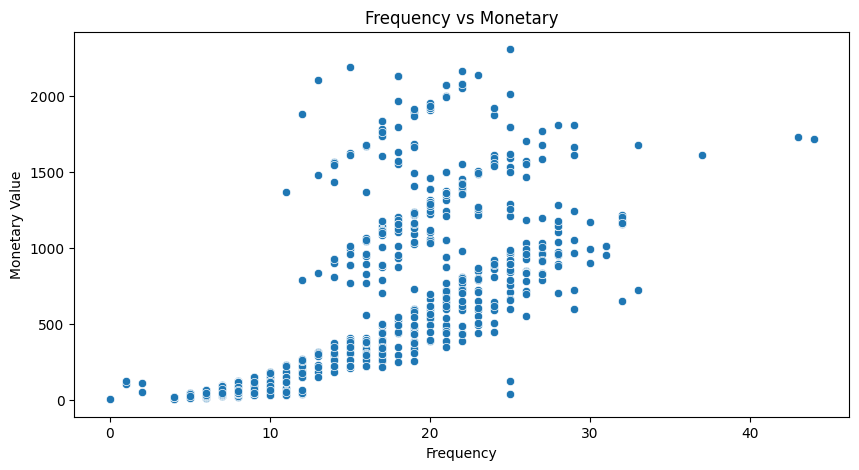

In [11]:
#freq vs monetory
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Frequency', y='Monetary', data=df)
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.show()

- Strong correlation between frequency and monetory value
- high freq customers have high monetory valeus, indicating customers who buy more also spend more
- Increasing purchase frequency could increase overall spending per customer
  

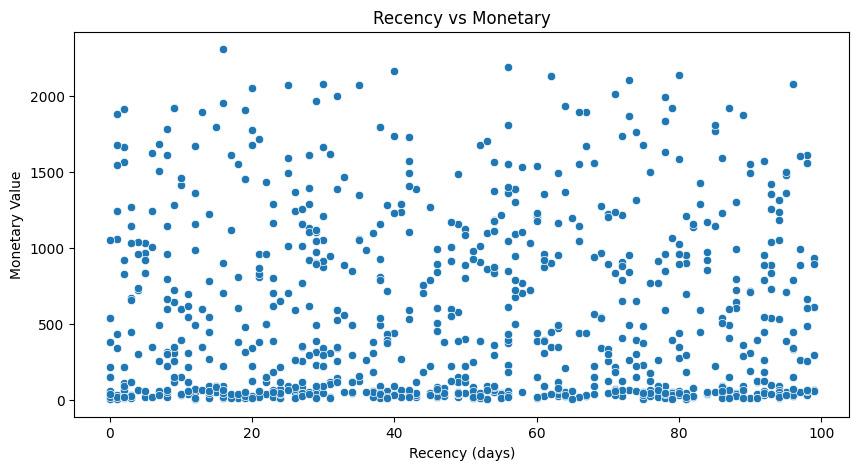

In [12]:
#recency vs monetory
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Recency', y='Monetary', data=df)
plt.title('Recency vs Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value')
plt.show()

- Similar to the Recency vs Frequency plot, there doesn’t seem to be a strong correlation between recency and monetary value.
- High-value customers (with higher monetary spending) are spread across different recency values, indicating that even customers who haven’t purchased recently can have high monetary values.
- This suggests that recency alone may not be a sufficient indicator of a high-value customer, and frequency and monetary value may play a more significant role.

#### Overall:

- Frequency and Monetary have a strong positive relationship, indicating that more frequent buyers tend to spend more.
- Recency doesn’t show a clear correlation with either frequency or monetary value, suggesting that it may not directly impact the value of the customer.

## Hypothesis testing

### 1. Customers who make frequent purchases or have high monetory spends are more likely to be high-value

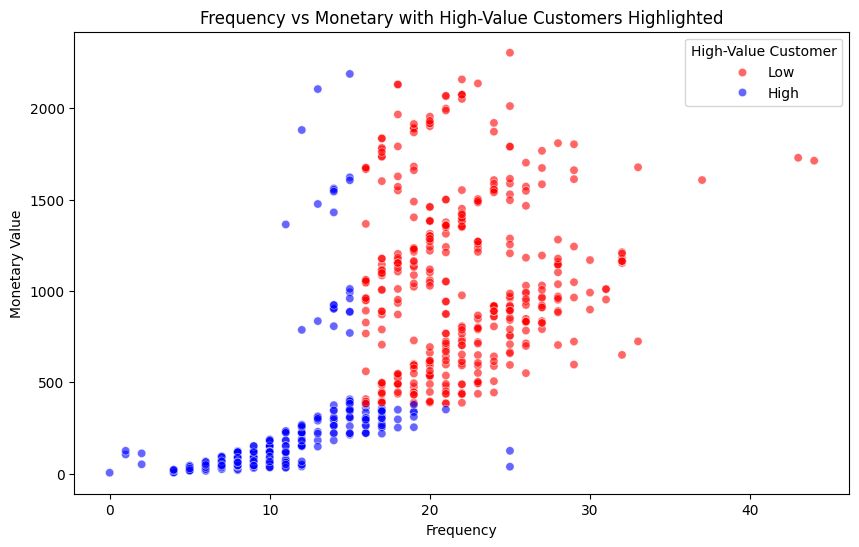

In [13]:
# To validate the hypothesis, we can create a scatter plot of Frequency vs Monetary with color-coding for High-Value Customers.
# We can define high-value customers as those above the median for both frequency and monetary spending.

import matplotlib.pyplot as plt
import seaborn as sns

# Define high-value customers based on being above the median in both Frequency and Monetary.
df['High_Value'] = ((df['Frequency'] >= df['Frequency'].median()) &
                        (df['Monetary'] >= df['Monetary'].median())).astype(int)

# Scatter plot for Frequency vs Monetary with High-Value customers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Frequency', y='Monetary', hue='High_Value', palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('Frequency vs Monetary with High-Value Customers Highlighted')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend(title='High-Value Customer', labels=['Low', 'High'])
plt.show()


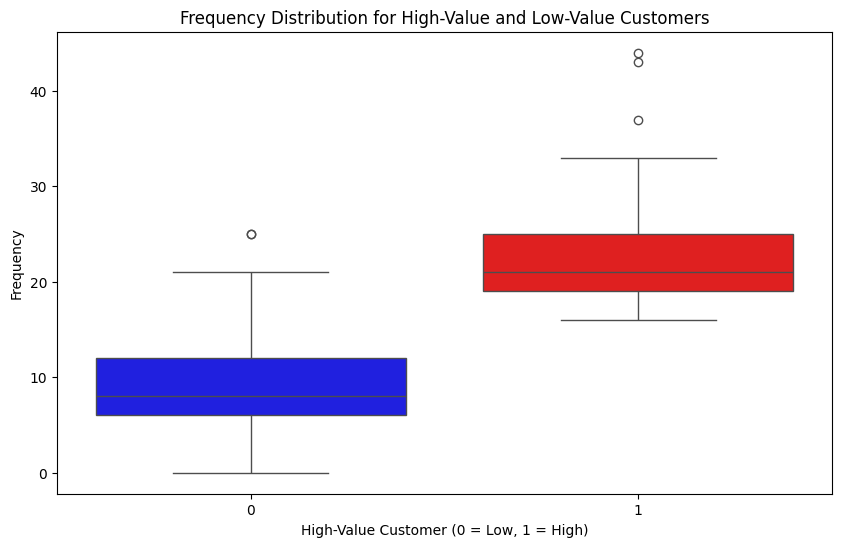

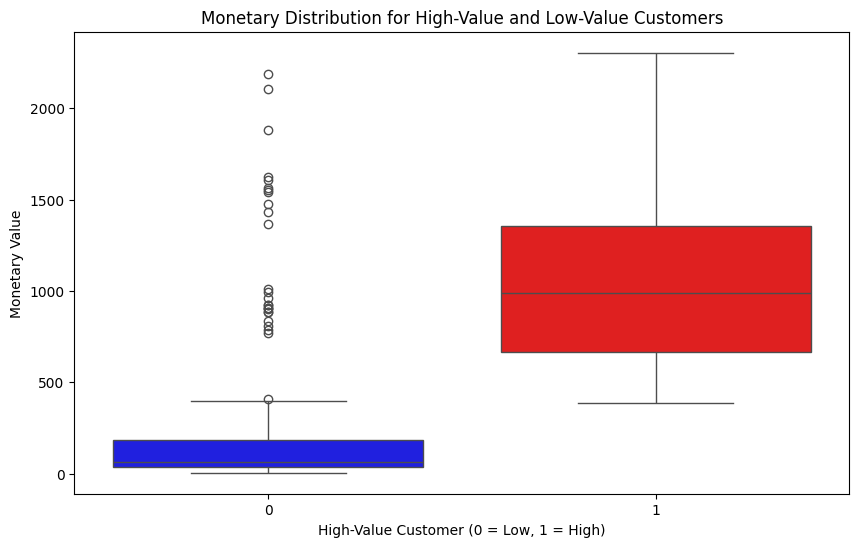

In [14]:
# Ensure High_Value is treated as a categorical variable
df['High_Value1'] = df['High_Value'].astype('category')

# Box plot for Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='High_Value', y='Frequency', palette=['blue', 'red'])
plt.title('Frequency Distribution for High-Value and Low-Value Customers')
plt.xlabel('High-Value Customer (0 = Low, 1 = High)')
plt.ylabel('Frequency')
plt.show()

# Box plot for Monetary
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='High_Value', y='Monetary', palette=['blue', 'red'])
plt.title('Monetary Distribution for High-Value and Low-Value Customers')
plt.xlabel('High-Value Customer (0 = Low, 1 = High)')
plt.ylabel('Monetary Value')
plt.show()


- High-Value Customers (in red) tend to have both higher purchase frequency and higher monetary spending. This aligns with the hypothesis that customers who make frequent purchases and have high monetary spending are more likely to be high-value.
- Low-Value Customers (in blue) are clustered towards the lower end of both frequency and monetary value, indicating they are less engaged and spend less.


### 2. Income and family size might impact purchasing behavior, affecting the customer value

In [15]:
# # Calculate the 99th percentile for Income and Monetary
# income_threshold = df['Income'].quantile(0.99)
# monetary_threshold = df['Monetary'].quantile(0.99)

# # Filter out the outliers
# df_filtered = df[(df['Income'] <= income_threshold) & (df['Monetary'] <= monetary_threshold)]

# # Scatter plot of Income vs Monetary with Family Size and High-Value Customers highlighted (after removing outliers)
# plt.figure(figsize=(12, 8))
# sns.scatterplot(data=df_filtered, x='Income', y='Monetary', size='Family_Size', hue='High_Value',
#                 sizes=(20, 200), palette={0: 'blue', 1: 'red'}, alpha=0.6, legend='brief')
# plt.title('Income vs Monetary with Family Size and High-Value Customers')
# plt.xlabel('Income')
# plt.ylabel('Monetary Value')
# plt.legend(title='High-Value Customer', labels=['Low', 'High'])
# plt.show()

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Frequency,Monetary,High_Value,High_Value1
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,25,1529,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,6,21,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,8,48,0,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,22,702,1,1
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,10,146,0,0


### Finding alpha and beta values

In [17]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

# # Define target variable (e.g., 'Monetary' as a proxy for high-value, or another target if available)
# y = df['Monetary']  # Replace this with your actual target variable if different

# # Prepare features for the score formula
# X = df[['Recency', 'Frequency', 'Monetary']]
# X['Recency_Frequency'] = X['Recency'] * X['Frequency']
# X['Frequency_Monetary'] = X['Frequency'] * X['Monetary']
# X['Monetary_Recency'] = X['Monetary'] * X['Recency']
# X['Recency_Frequency_Monetary'] = X['Recency'] * X['Frequency'] * X['Monetary']

# # Split the data for training and testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit a Linear Regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Extract the coefficients
# alpha = model.intercept_
# beta1, beta2, beta3, beta4, beta5, beta6, beta7 = model.coef_

# # Display the optimized values
# print("Optimized values:")
# print(f"alpha = {alpha}")
# print(f"beta1 = {beta1}, beta2 = {beta2}, beta3 = {beta3}")
# print(f"beta4 = {beta4}, beta5 = {beta5}, beta6 = {beta6}, beta7 = {beta7}")

# # Optionally, you can evaluate the model on test data
# from sklearn.metrics import mean_squared_error, r2_score
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")


In [18]:
# alpha = -1.1368683772161603e-13
# beta1 = 5.800134617765302e-14
# beta2 = 7.218572855110086e-15
# beta3 = 0.9999999999999999
# beta4 = -2.0644733651376006e-15
# beta5 = -4.522118405388867e-17
# beta6 = -6.584552729190058e-17
# beta7 = 1.9661054496890136e-18

In [19]:
# df['score'] = (alpha
#                + beta1 * df['Recency']
#                + beta2 * df['Frequency']
#                + beta3 * df['Monetary']
#                + beta4 * df['Recency'] * df['Frequency']
#                + beta5 * df['Frequency'] * df['Monetary']
#                + beta6 * df['Monetary'] * df['Recency']
#                + beta7 * df['Frequency'] * df['Recency'] * df['Monetary'])

In [20]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Frequency,Monetary,High_Value,High_Value1
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,25,1529,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,6,21,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,8,48,0,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,22,702,1,1
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,10,146,0,0


In [21]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Frequency,Monetary,High_Value
count,905.000000,905.000000,905.000000,905.000000,905.000000,905,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.00000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.0,905.0,905.000000,905.000000,905.000000,905.000000
mean,5791.775691,1969.005525,53431.502762,0.450829,0.510497,2013-07-01 04:55:57.348066304,48.593370,308.401105,27.950276,173.194475,39.327072,27.182320,44.096133,2.332597,4.090608,2.781215,5.81105,5.186740,0.069613,0.076243,0.082873,0.066298,0.007735,0.009945,3.0,11.0,0.148066,15.015470,576.055249,0.466298
min,0.000000,1940.000000,2447.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,5.000000,0.000000
25%,2928.000000,1959.000000,34968.000000,0.000000,0.000000,2013-01-06 00:00:00,24.000000,25.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,8.000000,59.000000,0.000000
50%,5872.000000,1971.000000,52852.000000,0.000000,0.000000,2013-07-02 00:00:00,49.000000,183.000000,9.000000,69.000000,13.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,16.000000,382.000000,0.000000
75%,8686.000000,1978.000000,68682.000000,1.000000,1.000000,2013-12-10 00:00:00,74.000000,509.000000,36.000000,252.000000,58.000000,35.000000,58.000000,3.000000,6.000000,4.000000,8.00000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,21.000000,970.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,196.000000,321.000000,15.000000,25.000000,28.000000,13.00000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,44.000000,2304.000000,1.000000
std,3263.699044,11.827436,30226.700287,0.546572,0.546662,NaN,29.169105,334.802632,41.396432,230.718841,55.144934,41.136952,51.439420,1.962279,2.787569,3.054932,3.22509,2.408834,0.254635,0.265533,0.275842,0.248940,0.087655,0.099281,0.0,0.0,0.355362,7.693649,579.002137,0.499139


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define a binary target variable (1 if high-value, 0 if low-value)
# For example, classify as high-value if Monetary is above the median
# threshold = df['Monetary'].median()

freq_threshold = df['Frequency'].quantile(0.75)
monetary_threshold = df['Monetary'].quantile(0.75)
df['High_Value'] = df['High_Value'] = ((df['Frequency'] >= freq_threshold) & (df['Monetary'] >= monetary_threshold)).astype(int)

# Redefine the target (y) and features (X)
y = df['High_Value']
X = df[['Recency', 'Frequency']]
X['Recency_Frequency'] = X['Recency'] * X['Frequency']
X['Frequency_Monetary'] = X['Frequency'] * df['Monetary']
X['Monetary_Recency'] = df['Monetary'] * X['Recency']
X['Recency_Frequency_Monetary'] = X['Recency'] * X['Frequency'] * df['Monetary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model for classification
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Display coefficients
coefficients = model.coef_[0]
alpha = model.intercept_[0]
print("Optimized values:")
print(f"alpha = {alpha}")
print(f"beta1 (Recency) = {coefficients[0]}, beta2 (Frequency) = {coefficients[1]}")
print(f"beta4 (Recency * Frequency) = {coefficients[2]}")
print(f"beta5 (Frequency * Monetary) = {coefficients[3]}")
print(f"beta6 (Monetary * Recency) = {coefficients[4]}")
print(f"beta7 (Recency * Frequency * Monetary) = {coefficients[5]}")

Accuracy: 0.9779005524861878
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       163
           1       1.00      0.78      0.88        18

    accuracy                           0.98       181
   macro avg       0.99      0.89      0.93       181
weighted avg       0.98      0.98      0.98       181

[[163   0]
 [  4  14]]
Optimized values:
alpha = -0.02072616893407458
beta1 (Recency) = -0.10217961731385627, beta2 (Frequency) = -0.13019581519726445
beta4 (Recency * Frequency) = -0.0059543720706683335
beta5 (Frequency * Monetary) = 8.175098068853329e-05
beta6 (Monetary * Recency) = -0.0003263160386357288
beta7 (Recency * Frequency * Monetary) = 2.2986083736172615e-05


In [23]:
alpha = -0.02423542463644679
beta1 = -0.14134771680504543
beta2 = -0.1786572436495882
beta4 = -0.0019375867553737438
beta5 = 0.0001297929744405418
beta6 = -0.0002934209548644681
beta7 = 1.9958702944796875e-05

# Modeling

### Restoring original data frame

In [24]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [42]:
data = pd.read_csv('/content/marketing_campaign.csv', sep='\t')
df=data

# Data Cleaning

missing_values = df.isnull().sum()

duplicates = df.duplicated().sum()

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')  # Convert to datetime format

# 4. Fill or drop missing values for further steps
# For simplicity, we'll drop rows with missing data for this demo, but real analysis may consider imputation
df = df.dropna()

df['Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)


### Adding in score metric

In [26]:
alpha = -0.02423542463644679
beta1 = -0.14134771680504543
beta2 = -0.1786572436495882
beta4 = -0.0019375867553737438
beta5 = 0.0001297929744405418
beta6 = -0.0002934209548644681
beta7 = 1.9958702944796875e-05

In [27]:
df['score'] = (alpha + beta1 * df['Recency'] + beta2 * df['Frequency']
               + beta4 * df['Recency'] * df['Frequency']
               + beta5 * df['Frequency'] * df['Monetary']
               + beta6 * df['Monetary'] * df['Recency']
               + beta7 * df['Frequency'] * df['Recency'] * df['Monetary'])

In [28]:
print(df['score'].max())
print(df['score'].min())

50.294351510602084
-20.438829779025156


### Score Normalization

Performing (Z-score Normalization)

Standardization shifts the mean of the scores to 0 and hence, scores above 0 are above the average, and those below 0 are below the average.

In [29]:
mean_score = df['score'].mean()
std_score = df['score'].std()

df['standardized_score'] = (df['score'] - mean_score) / std_score

Creating another df copy and preparing for modeling

In [30]:
df_updated = df

In [105]:
df_updated.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,High_Value,High_Value1,standardized_score
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1,1.928164
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,-0.144604


In [114]:
df_updated.drop(['Response','Frequency','Monetary','score'],axis=1,inplace = True)

KeyError: "['Response', 'Frequency', 'Monetary', 'score'] not found in axis"

In [33]:
df_updated.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,High_Value,High_Value1,standardized_score
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1,1.928164
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,-0.144604
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,0.050072
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,1,0.386700
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,0,-0.168743


Creating a data frame for just high value customers (customers with standardized_score > 0)

In [48]:
mask = df_updated['standardized_score'] > 0
df_hvc = df_updated[mask]

In [49]:
#Viewing number of datapoints
len(df_hvc)

454

Need to perform one hot encoding for predictors which are categorical in nature.

In [36]:
df_hvc_encoded = pd.get_dummies(df_hvc, columns=['Education', 'Marital_Status'], drop_first=True)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Assume today's date or the most recent date in your dataset as a reference
reference_date = pd.to_datetime("2016-01-01")  # Update to a relevant date
df_hvc_encoded['Days_Since_Enrollment'] = (reference_date - pd.to_datetime(df_hvc['Dt_Customer'])).dt.days

# Define features (X) including Days_Since_Enrollment and target (y)
X = df_hvc_encoded.drop(columns=['AcceptedCmp5', 'ID', 'Dt_Customer'])  # Now Dt_Customer is replaced with Days_Since_Enrollment
y = df_hvc_encoded['AcceptedCmp5']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8681318681318682
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        82
           1       0.36      0.44      0.40         9

    accuracy                           0.87        91
   macro avg       0.65      0.68      0.66        91
weighted avg       0.88      0.87      0.87        91

[[75  7]
 [ 5  4]]


## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Define features (X) and target (y)
X = df_hvc_encoded.drop(columns=['AcceptedCmp5', 'ID', 'Dt_Customer'])
y = df_hvc_encoded['AcceptedCmp5']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the random forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Optional: Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

Accuracy: 0.945054945054945
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        82
           1       0.75      0.67      0.71         9

    accuracy                           0.95        91
   macro avg       0.86      0.82      0.84        91
weighted avg       0.94      0.95      0.94        91

[[80  2]
 [ 3  6]]

Feature Importances:
                    Feature  Importance
1                    Income    0.168810
5                  MntWines    0.131715
7           MntMeatProducts    0.071873
25       standardized_score    0.066476
9          MntSweetProducts    0.050651
35    Days_Since_Enrollment    0.050447
17             AcceptedCmp4    0.040513
8           MntFishProducts    0.039612
6                 MntFruits    0.037882
4                   Recency    0.037434
15        NumWebVisitsMonth    0.037142
10             MntGoldProds    0.036763
13      NumCatalogPurchases    0.032254
11        NumDealsPurchases    0.030424
0   

## XG Boost

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Define features (X) and target (y)
X = df_hvc_encoded.drop(columns=['AcceptedCmp5', 'ID', 'Dt_Customer'])
y = df_hvc_encoded['AcceptedCmp5']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # Suppresses warnings
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Optional: Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:High_Value1: category

## Neural Network

In [40]:
#pip install tensorflow

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define features (X) and target (y)
X = df_hvc_encoded.drop(columns=['AcceptedCmp5', 'ID', 'Dt_Customer'])
y = df_hvc_encoded['AcceptedCmp5']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better neural network performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5500 - loss: 0.6778 - val_accuracy: 0.8630 - val_loss: 0.4995
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8278 - loss: 0.4928 - val_accuracy: 0.8767 - val_loss: 0.3991
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8743 - loss: 0.3643 - val_accuracy: 0.8767 - val_loss: 0.3467
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8877 - loss: 0.2857 - val_accuracy: 0.8767 - val_loss: 0.3225
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9019 - loss: 0.2458 - val_accuracy: 0.8767 - val_loss: 0.3124
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9159 - loss: 0.2041 - val_accuracy: 0.8904 - val_loss: 0.3071
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9460 - loss: 0.1772 - val_accuracy: 0.8904 - val_loss: 0.3062
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9246 - loss: 0.1877 - val_accuracy: 0.8767 - val_loss

## KNN


In [137]:

from sklearn.neighbors import KNeighborsClassifier

# Define features (X) and target (y)
X = df_hvc_encoded.drop(columns=['AcceptedCmp5', 'ID', 'Dt_Customer'])
y = df_hvc_encoded['AcceptedCmp5']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        82
           1       0.75      0.33      0.46         9

    accuracy                           0.92        91
   macro avg       0.84      0.66      0.71        91
weighted avg       0.91      0.92      0.91        91

[[81  1]
 [ 6  3]]


In [134]:

# Define features (X) and target (y)
X = df[['Recency', 'Frequency', 'Monetary']]
y = df['AcceptedCmp5']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9060773480662984
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       168
           1       0.17      0.08      0.11        13

    accuracy                           0.91       181
   macro avg       0.55      0.52      0.53       181
weighted avg       0.88      0.91      0.89       181

[[163   5]
 [ 12   1]]


## K Means Clustering on RFM

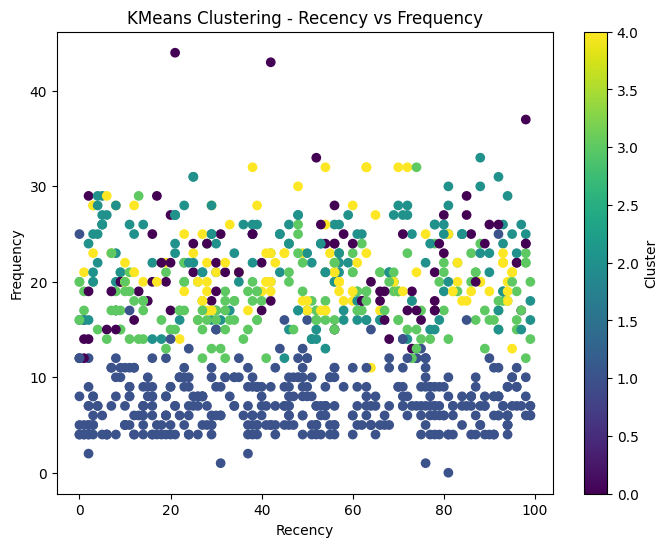

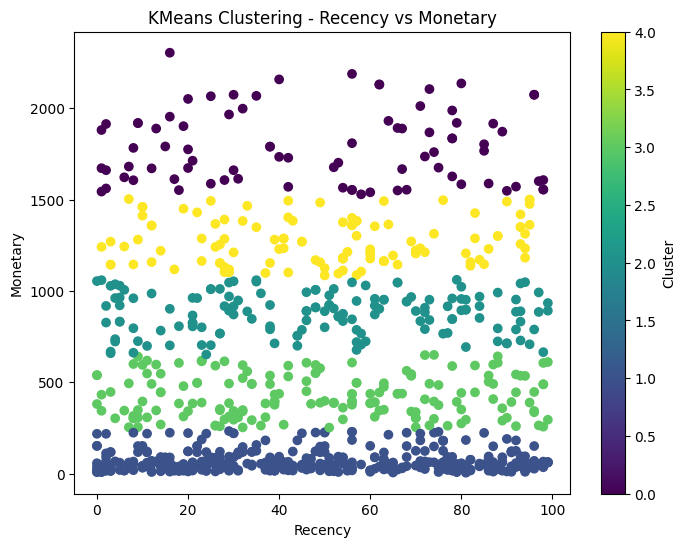

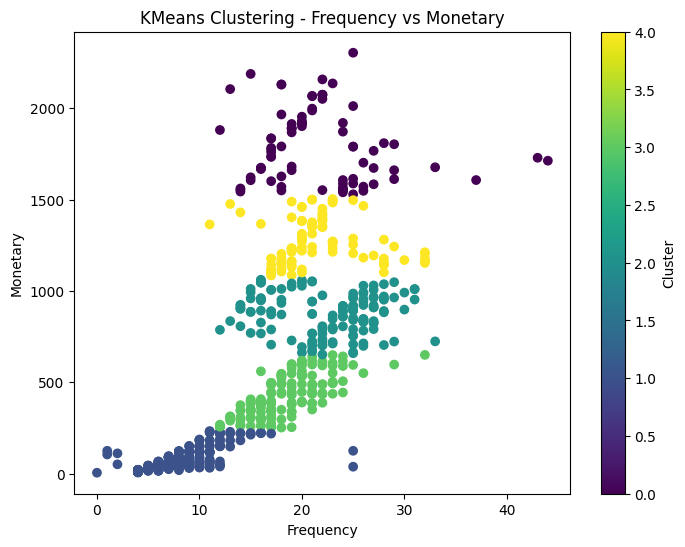

In [138]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering (RFM)
rfm_features = ['Recency', 'Frequency', 'Monetary']
X = df[rfm_features]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Replace 3 with the optimal number of clusters
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters (example with pairwise scatter plots)
for i in range(len(rfm_features)):
    for j in range(i + 1, len(rfm_features)):
        plt.figure(figsize=(8, 6))
        plt.scatter(df[rfm_features[i]], df[rfm_features[j]], c=df['Cluster'], cmap='viridis')
        plt.xlabel(rfm_features[i])
        plt.ylabel(rfm_features[j])
        plt.title(f'KMeans Clustering - {rfm_features[i]} vs {rfm_features[j]}')
        plt.colorbar(label='Cluster')  # Add colorbar
        plt.show()